In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample_submission.csv')

## train data 형태 확인

In [3]:
train.loc[0]

AnimalID                        A671945
Name                            Hambone
DateTime            2014-02-12 18:22:00
OutcomeType             Return_to_owner
OutcomeSubtype                      NaN
AnimalType                          Dog
SexuponOutcome            Neutered Male
AgeuponOutcome                   1 year
Breed             Shetland Sheepdog Mix
Color                       Brown/White
Name: 0, dtype: object

In [4]:
train.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


In [5]:
train['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [6]:
train['OutcomeSubtype'].value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [7]:
train['AnimalType'].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

In [8]:
train['SexuponOutcome'].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [9]:
train['AgeuponOutcome'].value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
9 years       288
7 months      288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
6 days         50
4 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

In [10]:
train['Breed'].value_counts()

Domestic Shorthair Mix                     8810
Pit Bull Mix                               1906
Chihuahua Shorthair Mix                    1766
Labrador Retriever Mix                     1363
Domestic Medium Hair Mix                    839
German Shepherd Mix                         575
Domestic Longhair Mix                       520
Siamese Mix                                 389
Australian Cattle Dog Mix                   367
Dachshund Mix                               318
Boxer Mix                                   245
Miniature Poodle Mix                        233
Border Collie Mix                           229
Australian Shepherd Mix                     163
Rat Terrier Mix                             157
Catahoula Mix                               157
Jack Russell Terrier Mix                    146
Yorkshire Terrier Mix                       143
Domestic Shorthair                          143
Chihuahua Longhair Mix                      142
Siberian Husky Mix                      

In [11]:
train['Color'].value_counts()

Black/White                  2824
Black                        2292
Brown Tabby                  1635
Brown Tabby/White             940
White                         931
Brown/White                   884
Orange Tabby                  841
Tan/White                     773
Tricolor                      752
Blue/White                    702
Black/Tan                     672
White/Black                   643
Brown                         639
Tan                           628
White/Brown                   569
Tortie                        530
Calico                        517
Orange Tabby/White            455
Brown Brindle/White           450
Blue                          450
Black/Brown                   436
Blue Tabby                    433
White/Tan                     389
Red                           337
Torbie                        335
Brown/Black                   333
Red/White                     331
Blue Tabby/White              241
Brown Brindle                 232
Chocolate/Whit

    - 10개의 Column
        - AnimalID, Name, DateTime, OutcomeType, OutcomeSubtype, AnimalType, SexuponOutcome, AgeuponOutcome, Breed, Color
    1. 각 동물은 AnimalID 라는 고유의 값을 가짐
    2. Name에 NaN 값이 존재
    3. DateTime
    4. OutcomeType은 4가지
        - Adoption, Transfer, Return_to_owner, Euthanasia, Died
    5. OutcomeSubtype은 16가지
        - NaN 존재
    6. AnimalType은 2가지
        - Dog, Cat
    7. SexuponOutcome은 4가지
        - Neutered Male(중성화 수컷), Spayed Female(중성화 암컷), Intact Male(수컷), Intact Female(암컷)
    8. AgeuponOutcome은 매우 다양
    9. Breed(품종), 1380종
    10. Color

## Data 시각화

In [12]:
fig = plt.figure()

In [13]:
ax3 = fig.add_subplot(2, 2, 3)


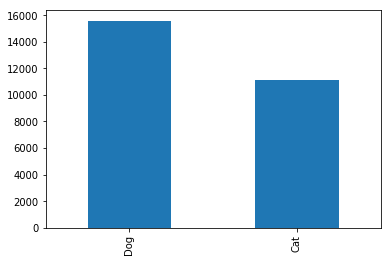

In [14]:
train['AnimalType'].value_counts().plot(kind = 'bar')

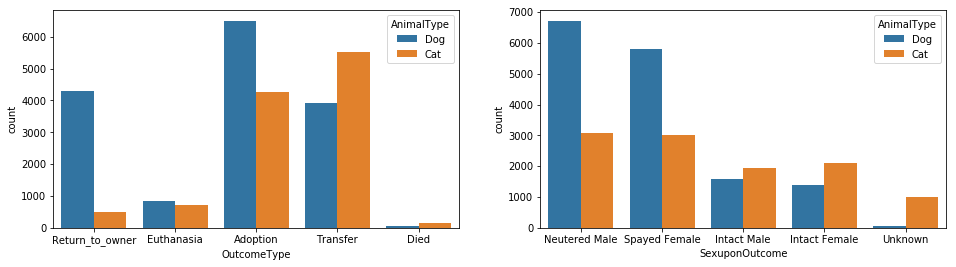

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(data=train, x='OutcomeType', hue='AnimalType', ax = ax1)
sns.countplot(data=train, x='SexuponOutcome', hue='AnimalType', ax=ax2)

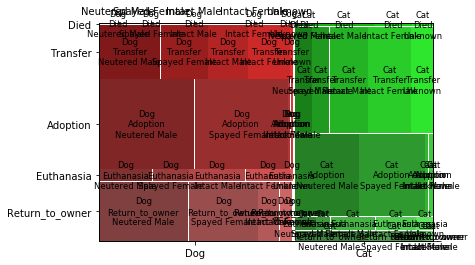

In [71]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

fig = plt.figure()
ax = fig.add_subplot(111)
mosaic = mosaic(train, ['AnimalType', 'OutcomeType', 'SexuponOutcome'], ax=ax)

## 더미화

In [24]:
AnimalType = pd.get_dummies(train['AnimalType'])
OutcomeType = pd.get_dummies(train['OutcomeType'])
OutcomeSubtype = pd.get_dummies(train['OutcomeSubtype'])